<a href="https://colab.research.google.com/github/theaok/datManPy/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

**DAT MAN: pandas, like stata, your lib for all data mgmt, much stats and vis)**

pandas helps a lot with traditional/2d data, kind of like r or stata, and quite unlike the rest of Py

there are no textbooks for this course, but if you like to have a textbook:

https://wesmckinney.com/book/ by creator of pandas, detailed, thorough

https://jakevdp.github.io/PythonDataScienceHandbook/ little dated but great


<br> cheat sheets:

https://github.com/theaok/data/blob/main/Pandas_Cheat_Sheet.pdf

https://github.com/theaok/data/blob/main/Data_Wrangling_Cheat_Sheet.pdf


<br>REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html


<br>for stata users:

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

<br>tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

<br>for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


### [sep5] dive into python: load real data (csv file), and basics                                                

(do note can collapse sec, and run all cells at once)

any software incl excel and spss can save as csv,    just make sure it is clean: one short alphanumeric header per column                                                                                                                                                                  
let's do an example, your first ps will be sth like that but using your own data                                                             



In [ ]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
ex1.csv  sample_data


In [ ]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [ ]:
dat.columns #list var names

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)
dat.tail(2)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6


,Person,Height,Self Esteem
18,19,63,3.4
19,20,61,3.6


In [ ]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6
2,3,62,3.8
3,4,75,4.4
4,5,58,3.2
5,6,60,3.1
6,7,67,3.8
7,8,68,4.1
8,9,71,4.3
9,10,69,3.7


In [ ]:
dat["Height"][0:3] #subset or slice

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Height","Self Esteem"]][0:3]

,Height,Self Esteem
0,68,4.1
1,71,4.6
2,62,3.8


In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

,Person,Height,Self Esteem
3,4,75,4.4
16,17,65,4.1
6,7,67,3.8
10,11,68,3.5
2,3,62,3.8
14,15,60,3.4
4,5,58,3.2
17,18,67,3.8
7,8,68,4.1
1,2,71,4.6


In [ ]:
#dat["Height"]

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: Height, dtype: int64

<Axes: >

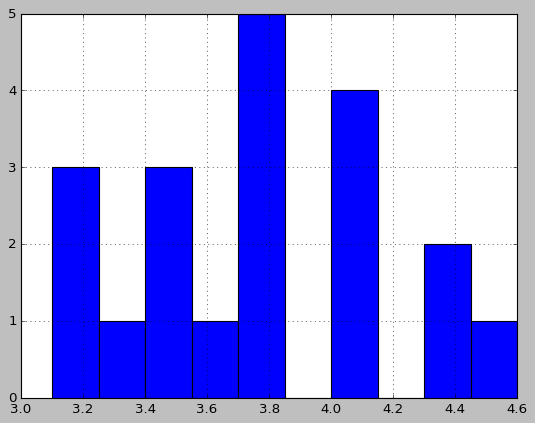

In [ ]:
dat["Self Esteem"].hist() #again, always interpret all output

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.3,4.4,4.6
Height,,,,,,,,,,,,,
58,0,1,0,0,0,0,0,0,0,0,0,0,0
60,1,0,0,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,0,0,0
62,0,0,1,0,0,0,0,1,0,0,0,0,0
63,0,0,0,1,0,0,1,0,1,0,0,0,0
65,0,0,0,0,0,0,0,0,0,1,0,0,0
67,0,1,0,0,0,0,0,2,0,0,0,0,0
68,0,0,0,0,1,0,0,0,0,2,0,0,0
69,0,0,0,0,0,0,1,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Height', ylabel='Self Esteem'>

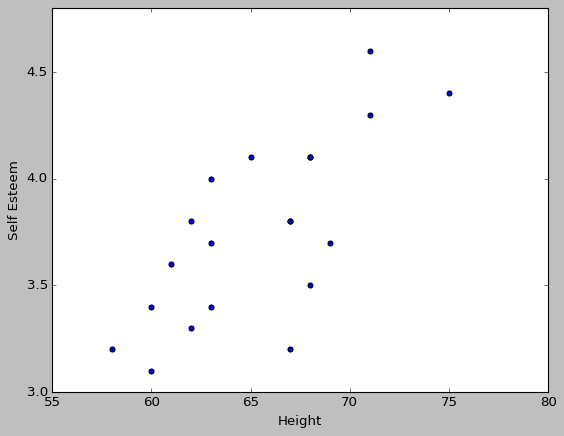

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

,Height,Self Esteem
Height,1.00,0.73
Self Esteem,0.73,1.00


### [sep12] I/O import/export
can import-export ~20 formats eg csv, json, xml, xls, stata, sas:
https://pandas.pydata.org/docs/user_guide/io.html

if you work a lot with xls check out:

https://realpython.com/openpyxl-excel-spreadsheets-python/

https://automatetheboringstuff.com/chapter12/


In [ ]:
#lets start with html, and especially handy wikipedia
#for match use header of col; ideally unique; case may matter
pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey',match='Density',flavor=None)[0].head(3)

,County,FIPS code[12],County seat[13],Largest City[14],Est.[13],Formed from[6][7],Named for[15],Density (per mi2),Pop.[16],Area[13],Map
0,Atlantic County,1,Mays Landing,"Egg Harbor Township 47,842",1837,Gloucester County,"The Atlantic Ocean, which forms the county's e...",491.33,275638,"561 sq mi (1,453 km2)",NaN
1,Bergen County,3,Hackensack,"Hackensack 46,030",1683,One of four original counties created in East ...,"Bergen, New Netherland settlement",4072.64,952997,234 sq mi (606 km2),NaN
2,Burlington County,5,Mount Holly,"Evesham Township 46,826",1694,One of two original counties created in West J...,The old ancient name for an inland market near...,579.01,466103,"805 sq mi (2,085 km2)",NaN


In [ ]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Name of Town")[0].head(5)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas

#note if bunch of tables and or cant easily fetch teh right one, just fetch them all
#and then select the right one
#tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#tables[0]
#tables[1]
#etc

,Name of Town,State,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help} Type,Population (2011),Ref
0,Achhnera,Uttar Pradesh,N.P.,22781,NaN
1,Adalaj,Gujarat,C.T.,11957,NaN
2,Adoor,Kerala,M,29171,NaN
3,Adyar,Karnataka,C.T.,7034,NaN
4,Adra,West Bengal,C.T.,14956,NaN


In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
# index is the key or id var.get_group
auto=pd.read_stata('auto.dta') #,index_col='make' load stata data
auto.head(2)
#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

#auto.to_stata('stata.dta') #save as stata data

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
make,,,,,,,,,,,
AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('auto.xlsx', 0)
excelTest1.head(2)
excelTest1.tail(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


In [ ]:
files.download('auto.xlsx') #download from colab/goog cloud onto your local hd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

note: python can download files from online as above, but it can also upload, say to github:
https://stackoverflow.com/questions/63427607/python-upload-files-directly-to-github-using-pygithub

### [sep12] basic descriptive stats
(more later under visualization)

descriptive statistics (and visualization) are key to understanding data; and understanding data is key to successful data management!!! use it a lot and make notes (text fields and or comments)

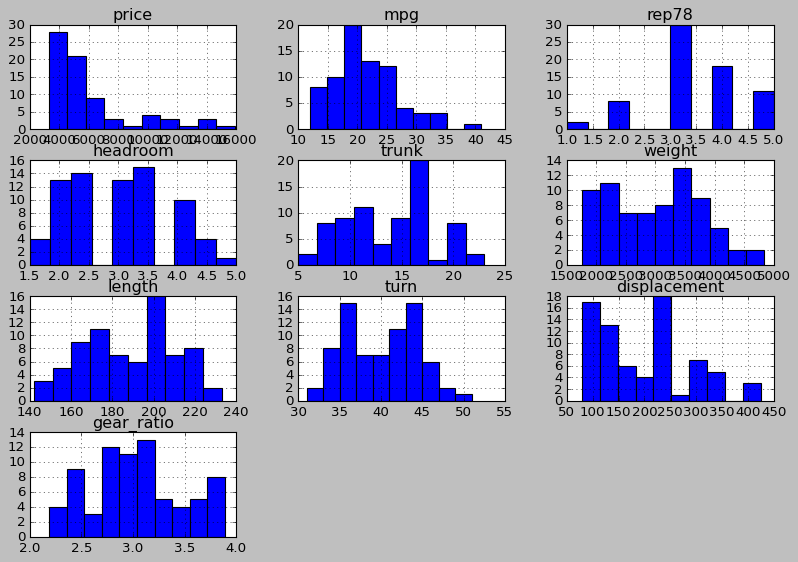

In [ ]:
#dir(auto) # all the stuff you can do on auto :)
#dir(auto.price) #and stuff you can do on price var
auto.hist(figsize=(12,8)); # eg hist

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:3]
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]
# can also use loc or iloc to subset/slice on both rows and cols

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
#subsetting on condition
auto.make[auto.mpg<15]
#auto['make'][auto['mpg']<15]
#auto.make[auto.mpg.isin([11,12,13,14])]

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
Name: make, dtype: object

In [ ]:
auto.make[(auto.mpg<15) | (auto.mpg>40)] #https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
70            VW Diesel
Name: make, dtype: object

In [ ]:
#subsetting using query
#auto.query("mpg<15  & foreign=='Foreign'")
#auto.query("weight <2000 | length <150")
auto.query("weight + length <2000")

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
23,Ford Fiesta,4389,28,4.0,1.5,9,1800,147,33,98,3.15,Domestic
42,Plym. Champ,4425,34,5.0,2.5,11,1800,157,37,86,2.97,Domestic
61,Honda Civic,4499,28,4.0,2.5,5,1760,149,34,91,3.30,Foreign
64,Renault Le Car,3895,26,3.0,3.0,10,1830,142,34,79,3.72,Foreign


In [ ]:
a=auto.set_index('make') #good idea to set index to sth meaningful

In [ ]:
a.loc['Honda Civic','mpg']
#a.loc[:'Honda Civic',:'mpg'] #all rows upto civic and cols upto mpg

28

In [ ]:
a.loc[a.mpg>40,'price']

make
VW Diesel    5397
Name: price, dtype: int16

In [ ]:
a.loc[["Honda Civic", "Ford Fiesta"]]['mpg']

make
Honda Civic    28
Ford Fiesta    28
Name: mpg, dtype: int16

In [ ]:
b=a.drop(index=["Honda Civic", "Ford Fiesta"])
len(a);print();len(b)

74

72

In [ ]:
#len(auto)
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #note: not 'str' but 'object' and 'category';

# Use a category when there is lots of repetition that you expect to exploit.
# A string variable consisting of only a few different values
# As a signal to other Python libraries that this column should be treated as a
#categorical variable (e.g. to use suitable statistical methods or plot types).

#https://wesmckinney.com/book/data-cleaning#pandas-categorical

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
auto.select_dtypes(include = ['float32']).head(2)

,headroom,gear_ratio
0,2.5,3.58
1,3.0,2.53


In [ ]:
#auto.filter(like='wei').head(2) #stata: lookfor wei
auto.filter(regex='.*t$').head(2)

,weight,displacement
0,2930,121
1,3350,258


In [ ]:
auto.make.str.contains('Honda').sum()


2

In [ ]:
auto.make.str.contains('.*nda').sum()


2

In [ ]:
auto.make[0:5] #note dtype

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
auto.foreign[0:5] #note dtype and categories

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [ ]:
#auto.describe()
auto.describe().T.round(2) #T just transposes

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.26,2949.50,3291.00,4220.25,5006.50,6332.25,15906.00
mpg,74.0,21.30,5.79,12.00,18.00,20.00,24.75,41.00
rep78,69.0,3.41,0.99,1.00,3.00,3.00,4.00,5.00
headroom,74.0,2.99,0.85,1.50,2.50,3.00,3.50,5.00
trunk,74.0,13.76,4.28,5.00,10.25,14.00,16.75,23.00
weight,74.0,3019.46,777.19,1760.00,2250.00,3190.00,3600.00,4840.00
length,74.0,187.93,22.27,142.00,170.00,192.50,203.75,233.00
turn,74.0,39.65,4.40,31.00,36.00,40.00,43.00,51.00
displacement,74.0,197.30,91.84,79.00,119.00,196.00,245.25,425.00
gear_ratio,74.0,3.01,0.46,2.19,2.73,2.96,3.35,3.89


In [ ]:
###groupby/agg
#https://wesmckinney.com/book/data-aggregation

auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)
#auto[['price','mpg','foreign']].groupby('foreign').median()

price                                                             \
         count     mean      std     min     25%     50%     75%      max   
foreign                                                                     
Domestic  52.0  6072.42  3097.10  3291.0  4185.5  4782.5  6199.5  15906.0   
Foreign   22.0  6384.68  2621.92  3748.0  4521.5  5759.0  7067.5  12990.0   

           mpg                                              
         count   mean   std   min    25%   50%   75%   max  
foreign                                                     
Domestic  52.0  19.83  4.74  12.0  16.75  19.0  22.0  34.0  
Foreign   22.0  24.77  6.61  14.0  21.00  24.5  27.5  41.0

In [ ]:
#auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs
auto.sort_values(by='mpg')[['mpg','make','price']][0:3] #3 cars with lowest mpg

,mpg,make,price
26,12,Linc. Mark V,13594
25,12,Linc. Continental,11497
29,14,Merc. Cougar,5379


<Axes: >

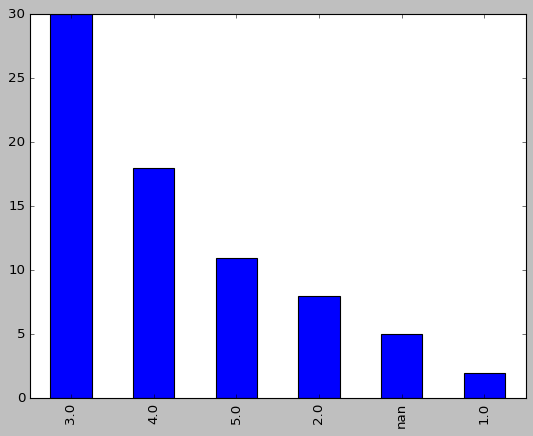

In [ ]:
#auto['rep78'].value_counts() #.nlargest(3)
auto['rep78'].value_counts(dropna=False).plot(kind='bar') #.nlargest(3)

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign,Domestic,Foreign
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


In [ ]:
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign

foreign
Domestic    19.83
Foreign     24.77
Name: mpg, dtype: float64

In [ ]:
pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)

,mpg
foreign,
Domestic,19.83
Foreign,24.77


In [ ]:
pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)

median  std min max
                  mpg  mpg mpg mpg
rep78 foreign                     
1.0   Domestic     21  4.2  18  24
2.0   Domestic     18  3.8  14  24
3.0   Domestic     19  4.1  12  29
      Foreign      23  2.5  21  26
4.0   Domestic     18  4.6  14  28
      Foreign      25  2.7  21  30
5.0   Domestic     32  2.8  30  34
      Foreign      25  9.4  17  41

In [ ]:
#auto.mpg.corr(auto.weight)
auto[['mpg','weight']].corr().round(2) #corr matrix

,mpg,weight
mpg,1.00,-0.81
weight,-0.81,1.00


### [sep19] manipulating data
[btw, often running cell by cell is pain--can just collapse the whole section and then run the whole section at once :)]

<br>https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html good read

<br>https://wesmckinney.com/book/data-cleaning very detailed, comprehensive but possibly tedious

<br>also may see per dropping, renaming, duplicate rows, outliers:
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

#### missing obs

important! almost always the case; critical to understand it

 Pandas treats None and NaN as essentially interchangeable for indicating missing or null values.

 My personal observation is that i had best luck with np.nan

In [ ]:
# index is the key or id var.get_group
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download') #,index_col='make' load stata data
auto.info() #useful function to see which var has missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


In [ ]:
auto['rep78'][0:3]
print()
auto['rep78'][0:3].notnull()
print()
auto['rep78'][0:3].isnull()

0    3.0
1    3.0
2    NaN
Name: rep78, dtype: float64

0     True
1     True
2    False
Name: rep78, dtype: bool

0    False
1    False
2     True
Name: rep78, dtype: bool

In [ ]:
# missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

auto['rep78'].value_counts(dropna=False) #doesn't show missing unless explicitly told
#print(auto['rep78'].to_string()) #print all rows
print()
print("count of missing:")
auto['rep78'].isnull().sum() #count missings on rep78 #NaN stands for missing
print()
#auto.loc[auto['rep78'].isnull()]
#auto[auto.rep78.isnull()][['rep78']]
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #stata: l make price mpg rep78 foreign if rep78==.

3.0    30
4.0    18
5.0    11
2.0     8
NaN     5
1.0     2
Name: rep78, dtype: int64


count of missing:


5

,make,price,mpg,rep78,foreign
2,AMC Spirit,3799,22,NaN,Domestic
6,Buick Opel,4453,26,NaN,Domestic
44,Plym. Sapporo,6486,26,NaN,Domestic
50,Pont. Phoenix,4424,19,NaN,Domestic
63,Peugeot 604,12990,14,NaN,Foreign


In [ ]:
auto2=auto.replace(np.nan, "None") #replace missing (np.nan) with "None"
auto2[auto2["rep78"]=="None"] #list the missing ones
#!!!BUT in Py best keep missing as np.nan, so in general do sth like:
#auto.replace(-99, np.nan,inplace=True) #replace all -99 with missing
#auto.fillna(np.nan, inplace=True) #replace missing with np.nan

#can also get rid of missing just keep finite stuff (in practice typically dont do it):
#auto3 = auto[np.isfinite(auto['rep78'])]
#auto3.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!
#len(auto)
#print()
#len(auto3)
##or more concisely for all of dataframe:
#len(auto)
#len(auto.dropna())
#auto.dropna(axis=1).dtypes #drop cols with missing data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
2,AMC Spirit,3799,22,None,3.0,12,2640,168,35,121,3.08,Domestic
6,Buick Opel,4453,26,None,3.0,10,2230,170,34,304,2.87,Domestic
44,Plym. Sapporo,6486,26,None,1.5,8,2520,182,38,119,3.54,Domestic
50,Pont. Phoenix,4424,19,None,3.5,13,3420,203,43,231,3.08,Domestic
63,Peugeot 604,12990,14,None,3.5,14,3420,192,38,163,3.58,Foreign


#### manipulating

In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta')

In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object) #tostring
auto['mpgNU'] = auto.mpgST.astype(float) #destring
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

,mpg,mpgST,mpgNU
0,22,22,22.0
1,17,17,17.0


mpg        int16
mpgST     object
mpgNU    float64
dtype: object

In [ ]:
auto = auto.rename(columns={'mpg': 'newMpg',
                           'make': 'newMake'})
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#in general better just subset/slice at the beginning: easier to keep than drop if many vars
#del auto['newMpg']
auto.drop('newMpg',axis=1) #can specify list of vars in [[]]

,newMake,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [ ]:
#https://www.statology.org/pandas-drop-rows-with-value/
auto=auto[auto.price!=4099]

In [ ]:
#new vars
auto['colOfOnes'] = 1
auto['colOfOnes'][0:3]
#auto.at[0,'colOfOnes']

0    1
1    1
2    1
Name: colOfOnes, dtype: int64

In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]
#rt so even if need to edit file by hand ie change vals in cells do it with code like here; not with excel!!
#also note this is mistake prone, double check; and again better if index is sth meaningful, then:
#auto.at['Honda Civic','colOfOnes'] = 10

0     1
1    10
2     1
3     1
4     1
Name: colOfOnes, dtype: int64

In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

auto['colOfOnes'][0:5]

0     2
1    10
2     2
3     2
4     2
Name: colOfOnes, dtype: int64

In [ ]:
# replace on condition
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
auto[['foreign','colOfOnes']][48:53]

,foreign,colOfOnes
48,Domestic,100
49,Domestic,100
50,Domestic,100
51,Domestic,100
52,Foreign,2


In [ ]:
auto.head(3)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic


In [ ]:
###map/recode

data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                             "pastrami", "corned beef", "bacon",
                             "pastrami", "honey ham", "nova lox"],
                             "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
#back to auto data
mapping  ={1:1
          ,2:1
          ,3:2
          ,4:2
          ,5:3}
a=auto.assign(rep78N=auto.rep78.map(mapping))
a[['rep78','rep78N']]

,rep78,rep78N
make,,
AMC Concord,3.0,2.0
AMC Pacer,3.0,2.0
AMC Spirit,NaN,NaN
Buick Century,3.0,2.0
Buick Electra,4.0,2.0
...,...,...
VW Dasher,4.0,2.0
VW Diesel,5.0,3.0
VW Rabbit,4.0,2.0


In [ ]:
##another example
# say have var X049 with 8cat and want to recode it into 6cat
#mapping = {1:'<10k'
#          ,2:'<10k'
#          ,3:'<10k'
#          ,4:'10-20k'
#          ,5:'20-50k'
#          ,6:'50-100k'
#          ,7:'.1-.5m'
#          ,8:'>.5m'
#                    }
#df=df.assign(rurUrb  = df.X049.map(mapping))

In [ ]:
# https://stackoverflow.com/questions/50068443/collapse-rows-in-pandas-dataframe-with-different-logic-per-column
auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count']) #stata: by sort: egen OR collapse

weight            length      
                 mean count        mean count
foreign                                      
Domestic  3317.115385    52  196.134615    52
Foreign   2315.909091    22  168.545455    22

In [ ]:
#lets unpack a bit as this groupby agg may be non-intuitive
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df
#and for a real world example using groupby agg see
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

,A,B,C
0,1,1,1.058948
1,1,2,-1.301589
2,2,3,-0.752999
3,2,4,0.993326


In [ ]:
df.groupby('A').agg('min')

,B,C
A,,
1,1,-1.301589
2,3,-0.752999


In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -1.301589  1.058948
2   3   4 -0.752999  0.993326

In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2 -0.242641
2   3   4  0.240328

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   newMake       74 non-null     object  
 1   price         74 non-null     int16   
 2   newMpg        74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


In [ ]:
#vafter groupby can get the groups
g=auto[['mpg','foreign']].groupby('foreign')
g.get_group('Domestic').head(3)
g.get_group('Foreign').head(3)

,mpg,foreign
0,22,Domestic
1,17,Domestic
2,22,Domestic


,mpg,foreign
52,17,Foreign
53,23,Foreign
54,25,Foreign


#### labelling

i'd just have nice descriptive (yet short) var names, ditch var labels; and for val labels just have another string var that has labels instead of values, eg foreignS: domestic/foreign; foreignN: 0/1



<br>BUT see a workaround with dict below for printing var labels from stata
other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas ;
https://stackoverflow.com/questions/22500108/value-label-in-pandas ;
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


<br>[LATER/TODO--see pandas docs
Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels). The idea is to use a dict to map some or all of the values for a variable.]



In [ ]:
# var labels #on stata iterator in py: https://kylebarron.dev/blog/reading-stata-files-with-python
pd.read_stata('auto.dta', iterator=True).variable_labels() #return stata reader obj
#itr.variable_labels()

# can also return data label and val labels
# pandas.io.stata.StataReader.data_label
# pandas.io.stata.StataReader.value_labels

{'make': 'Make and Model',
 'price': 'Price',
 'mpg': 'Mileage (mpg)',
 'rep78': 'Repair Record 1978',
 'headroom': 'Headroom (in.)',
 'trunk': 'Trunk space (cu. ft.)',
 'weight': 'Weight (lbs.)',
 'length': 'Length (in.)',
 'turn': 'Turn Circle (ft.) ',
 'displacement': 'Displacement (cu. in.)',
 'gear_ratio': 'Gear Ratio',
 'foreign': 'Car type'}

### [sep26] merge

remember, difficult and tedious but extremely useful

merge on geo (county, muni, school id, etc), time (year, day, hour, etc), or on both (panel)

and anything else that you can find in 2 different datasets, eg occ code

REFS:

https://stackoverflow.com/questions/53645882/pandas-merging-101 nice schematic!

http://pandas.pydata.org/pandas-docs/stable/merging.html

https://realpython.com/pandas-merge-join-and-concat/

https://sparkbyexamples.com/pandas/pandas-merge-dataframes-explained-examples/

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

https://wesmckinney.com/book/data-wrangling



In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

,id,A,B
0,1,A0,B0
1,2,A1,B1
2,3,A2,B2
3,4,A3,B3


,id,A,C
0,1,A4,C4
1,2,A5,C5
2,5,A6,C6
3,6,A7,C7


In [ ]:
mergedOuter = pd.merge(d1, d2, how='outer', on=['id'],indicator=True) #outer=keep all
mergedOuter

,id,A_x,B,A_y,C,_merge
0,1,A0,B0,A4,C4,both
1,2,A1,B1,A5,C5,both
2,3,A2,B2,NaN,NaN,left_only
3,4,A3,B3,NaN,NaN,left_only
4,5,NaN,NaN,A6,C6,right_only
5,6,NaN,NaN,A7,C7,right_only


In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
#do value counts on _merge and list the merge var (key,id) for these that failed merge
#be esp careful if both left and right didnt merge fully

mergedOuter['_merge'].value_counts() #.plot(kind='barh')
mergedOuter['id'][mergedOuter['_merge']=='left_only']
mergedOuter['id'][mergedOuter['_merge']=='right_only']
#pd.crosstab(mergedOuter["_merge"], mergedOuter["id"])

#clumsy way to check things around:
#mergedOuter.isnull().any() #double-check if any mismatches-may first look for rows with nulls
#mergedOuter[mergedOuter['A_x'].isnull()] #zoom in on A_x: aha so these with id 5 and 6 are missing on A_x
#mergedOuter.loc[mergedOuter['A_x'].isnull(), 'id'].unique() #convinently list ids that are missing on A_x
# 5 and 6, and we know that A_x comes from d1 and d1 ids are 1-4, so 5-6 must be missing, so we're good

left_only     2
right_only    2
both          2
Name: _merge, dtype: int64

2    3
3    4
Name: id, dtype: object

4    5
5    6
Name: id, dtype: object

In [ ]:
#another way
set(d1['id']).difference(set(d2['id'])) #.intersection(set(d1['id'])))
set(d2['id']).difference(set(d1['id']))

{'3', '4'}

{'5', '6'}

In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5


In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,3,A2,B2,NaN,NaN
3,4,A3,B3,NaN,NaN


In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,5,NaN,NaN,A6,C6
3,6,NaN,NaN,A7,C7


In [ ]:
#real world example

#get 1st dataset: counties and population
njCounties=pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/njCounties.csv")

#njCounties.head()
#njCounties.dtypes
#njCounties.describe().round(2)
njCounties[['COUNTY','POPDEN2010']]

#njCounties['POPDEN2010'].replace(450,450.9,inplace=True) #just an example
#njCounties['POPDEN2010'].hist(bins=5)
#njCounties.boxplot(column='POPDEN2010',by='REGION'), plt.show()

,COUNTY,POPDEN2010
0,ATLANTIC,450
1,BERGEN,3774
2,BURLINGTON,547
3,CAMDEN,2257
4,CAPE MAY,340
5,CUMBERLAND,313
6,ESSEX,6044
7,GLOUCESTER,857
8,HUDSON,12309
9,HUNTERDON,293


In [ ]:
#manipulating strings: often necessary!

#njCounties['COUNTY_LAB'].str[:-7]
#njCounties['COUNTY_LAB'].str.len() #https://www.geeksforgeeks.org/python-pandas-series-str-len/

#https://towardsdatascience.com/pandas-remove-unwanted-parts-from-strings-92ac881e60a2
njCounties['COUNTY_LAB'].str.replace(' County','') #note blank before the county

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: COUNTY_LAB, dtype: object

In [ ]:
#2nd dataset: counties and housing prices
!wget -q -O zillow.csv https://raw.githubusercontent.com/theaok/data/main/all_homes.csv
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


,UPPER,Data Type,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
0,NEW JERSEY,All Homes,256100,"$256,900","$258,300","$259,100",259700.0
1,ATLANTIC,All Homes,179900,"$179,700","$181,200","$183,100",185800.0
2,BERGEN,All Homes,375200,"$376,600","$377,000","$377,600",380000.0


<ipython-input-13-d80dbc9bea8c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


In [ ]:
#note that sometimes strangely enough strings that apparently do match dont merge, white space to blame!
njCounties['COUNTY']=njCounties['COUNTY'].str.strip()
zil1['COUNTY']=zil1['COUNTY'].str.strip()

<ipython-input-14-4b7f2869c32f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1['COUNTY']=zil1['COUNTY'].str.strip()


In [ ]:
#merge
njC1 = pd.merge(njCounties,zil1, on='COUNTY',how='outer',indicator=True)
#njC1.dtypes
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

,COUNTY,Dec 2012,POPDEN2010,_merge
0,ATLANTIC,185800.0,450.0,both
1,BERGEN,380000.0,3774.0,both
2,BURLINGTON,197800.0,547.0,both
3,CAMDEN,149400.0,2257.0,both
4,CAPE MAY,313600.0,340.0,both
5,CUMBERLAND,120100.0,313.0,both
6,ESSEX,282800.0,6044.0,both
7,GLOUCESTER,175900.0,857.0,both
8,HUDSON,293100.0,12309.0,both
9,HUNTERDON,327000.0,293.0,both


In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(njC1['POPDEN2010'],njC1['Dec 2012'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('hou pri', fontsize=16)
#for i, txt in enumerate(njC1['COUNTY']):
#    ax.annotate(txt, (njC1['POPDEN2010'][i],njC1['Dec 2012'][i]),fontsize=8)

#### [oct3] many to one; and more examples

REF:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

note its a whole free data science free online book with free notebooks :) may skim through other chapters etc

may also see:
https://stackoverflow.com/questions/44842458/merging-pandas-columns-one-to-many

In [2]:
# many to one

#first get some data, and start with one to one merge
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2,how='outer',indicator=True)

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3,df4) #so group is many in df3 to one in df4

,employee,group,hire_date,_merge
0,Bob,Accounting,2008,both
1,Jake,Engineering,2012,both
2,Lisa,Engineering,2004,both
3,Sue,HR,2014,both


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [ ]:
del df3['_merge']
pd.merge(df3, df4,how='outer',indicator=True) #note same syntax as for one to one

,employee,group,hire_date,supervisor,_merge
0,Bob,Accounting,2008,Carly,both
1,Jake,Engineering,2012,Guido,both
2,Lisa,Engineering,2004,Guido,both
3,Sue,HR,2014,Steve,both


In [4]:
#another real world example

#first get data, note alternative to urllib retreive:
!curl  -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl  -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl  -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   232k      0 --:--:-- --:--:-- --:--:--  233k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   2621      0 --:--:-- --:--:-- --:--:--  2625
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   4134      0 --:--:-- --:--:-- --:--:--  4152


In [7]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head(8)
areas.head()
abbrevs.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
5,AL,total,2011,4801627.0
6,AL,total,2009,4757938.0
7,AL,under18,2009,1134192.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [9]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation',indicator=True)
merged.head(3)

,state/region,ages,year,population,state,abbreviation,_merge
0,AL,under18,2012,1117489.0,Alabama,AL,both
1,AL,total,2012,4817528.0,Alabama,AL,both
2,AL,under18,2010,1130966.0,Alabama,AL,both


In [14]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
merged['_merge'].value_counts() #.plot(kind='barh') #left a problem, many 96

both          2448
left_only       96
right_only       0
Name: _merge, dtype: int64

In [ ]:
#!! and then step by step do all investigations as follows

In [18]:
merged['state/region'][merged['_merge']=='left_only'] #again many

2448     PR
2449     PR
2450     PR
2451     PR
2452     PR
       ... 
2539    USA
2540    USA
2541    USA
2542    USA
2543    USA
Name: state/region, Length: 96, dtype: object

In [19]:
merged['state/region'][merged['_merge']=='left_only'].value_counts() #aha 48 PR and USA

PR     48
USA    48
Name: state/region, dtype: int64

In [20]:
merged['year'][merged['_merge']=='left_only'].value_counts() #hmm like 4 per yr

1990    4
1991    4
2011    4
2010    4
2009    4
2013    4
2008    4
2007    4
2006    4
2005    4
2003    4
2004    4
2002    4
2001    4
2000    4
1999    4
1997    4
1998    4
1996    4
1995    4
1994    4
1992    4
1993    4
2012    4
Name: year, dtype: int64

In [21]:
merged.query("year == 1991 & _merge == 'left_only'") #lets zoom in

,state/region,ages,year,population,state,abbreviation,_merge
2450,PR,total,1991,NaN,NaN,NaN,left_only
2451,PR,under18,1991,NaN,NaN,NaN,left_only
2498,USA,total,1991,252980942.0,NaN,NaN,left_only
2499,USA,under18,1991,65313018.0,NaN,NaN,left_only


In [22]:
#ok so we got PR and US and bunch of years for ages total and under18
#make sure stuff like that wasnt in the right dataset:
merged['abbreviation'][merged['_merge']=='both'].unique() #yea no PR or USA there

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [23]:
merged['state'][merged['_merge']=='right_only']

Series([], Name: state, dtype: object)

In [24]:
#### this is helpful! always do it!!! unless super many ids
pd.crosstab(merged["state/region"],merged["_merge"])

_merge,left_only,both
state/region,,
AK,0,48
AL,0,48
AR,0,48
AZ,0,48
CA,0,48
CO,0,48
CT,0,48
DC,0,48
DE,0,48


In [15]:
#clumsy way:
# again and again super important to investigate what happened!!
#merged.isnull().any() #double-check if any mismatches-look for rows with nulls
#merged[merged['population'].isnull()] #aha! all PR <2000 and state entries also null, so there was no corresponding entry in the abbrevs key! let's see which regions dont match
# merged.loc[merged['state'].isnull(), 'state/region'].unique() #ta da! PR and USA are not in abbrevs key

In [ ]:
#merged.query("year == 2010 & ages == 'total'") # a neat way to subset!!

In [25]:
# merge on more than one var eg panel data: time-geo eg year-state uniquely ids a var

d1 = pd.DataFrame({'id': ['1',  '1',  '2',  '2'],
                   't': ['1', '2', '1', '2'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '2', '2'],
                   't': ['1', '2', '3', '4'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

,id,t,B
0,1,1,B0
1,1,2,B1
2,2,1,B2
3,2,2,B3


,id,t,C
0,1,1,C4
1,2,2,C5
2,2,3,C6
3,2,4,C7


In [28]:
pd.merge(d1, d2, how='outer', on=['id','t'],indicator=True) #outer=keep all

,id,t,B,C,_merge
0,1,1,B0,C4,both
1,1,2,B1,NaN,left_only
2,2,1,B2,NaN,left_only
3,2,2,B3,C5,both
4,2,3,NaN,C6,right_only
5,2,4,NaN,C7,right_only


merge tips:

simplify! eg subset to fewer obs and vars (as laways)

simplify! eg subset to fewer categories/hierarchies: eg only one cat per id, say instead of tot, mal, fem for each id (eg school) just subset to tot

beware of missing obs on key/id/merge var

double and triple check


### <font color='red'>>>>will be updated from here on>>></font>

$>>>$ TODO pick up editing here

## [*] extra topics

what we covered is useful most of the time

there is much more, however, some useful stuff listed below just briefly because most or many of you may not end up using those and i dont want to burden you with unnecessary stuff

but do let me know if any questions/need to cover any of these or any other topics

### [oct10] probabilistic merge

### strings and regexp

https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html

https://wesmckinney.com/book/data-cleaning#text_string_manip

https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter9-wrangling-advanced.html#working-with-strings

### reshape

reshape (wide_to_long), pivot, stack, unstack, melt

can be confusing see cheatsheets for schematics:

https://github.com/theaok/data/blob/main/Pandas_Cheat_Sheet.pdf

https://github.com/theaok/data/blob/main/Data_Wrangling_Cheat_Sheet.pdf

#### reshape, pivot

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
np.random.seed(123)
df = pd.DataFrame({"A1970" : {0 : "a", 1 : "b", 2 : "c"},
                   "A1980" : {0 : "d", 1 : "e", 2 : "f"},
                   "B1970" : {0 : 2.5, 1 : 1.2, 2 : .7},
                   "B1980" : {0 : 3.2, 1 : 1.3, 2 : .1},
                   "X"     : dict(zip(range(3), np.random.randn(3)))
                  })
df["id"] = df.index
df

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,-1.085631,0
1,b,e,1.2,1.3,0.997345,1
2,c,f,0.7,0.1,0.282978,2


In [ ]:
#pd.wide_to_long(df, ['x'], i='i', j='j')
pdLong=pd.wide_to_long(df, ["A", "B"], i="id", j="year")
pdLong
#A B are stubs/prefixes
#i is a unique id
#year is a new var to be created

,,X,A,B
id,year,,,
0,1970,-1.085631,a,2.5
1,1970,0.997345,b,1.2
2,1970,0.282978,c,0.7
0,1980,-1.085631,d,3.2
1,1980,0.997345,e,1.3
2,1980,0.282978,f,0.1


In [ ]:
pdLong.reset_index(level=[0,1],inplace=True)
pdLong

,id,year,X,A,B
0,0,1970,-1.085631,a,2.5
1,1,1970,0.997345,b,1.2
2,2,1970,0.282978,c,0.7
3,0,1980,-1.085631,d,3.2
4,1,1980,0.997345,e,1.3
5,2,1980,0.282978,f,0.1


In [ ]:
#long to wide
pdLong.pivot(index='id', columns='year', values=['X','A','B'])

X              A         B     
year      1970      1980 1970 1980 1970 1980
id                                          
0    -1.085631 -1.085631    a    d  2.5  3.2
1     0.997345  0.997345    b    e  1.2  1.3
2     0.282978  0.282978    c    f  0.7  0.1

In [ ]:
pdLong.unstack() #long to wide another way

X              A         B     
year      1970      1980 1970 1980 1970 1980
id                                          
0    -1.085631 -1.085631    a    d  2.5  3.2
1     0.997345  0.997345    b    e  1.2  1.3
2     0.282978  0.282978    c    f  0.7  0.1

In [ ]:
#more on pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31

#### stack, unstack, melt

In [ ]:
#https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/

In [ ]:
nba=pd.read_csv('https://raw.githubusercontent.com/theaok/data/main/nba.csv')[0:5]
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [ ]:
nbaStack=nba.stack()
nbaStack

0  Name            Avery Bradley
   Team           Boston Celtics
   Number                    0.0
   Position                   PG
   Age                      25.0
   Height                    6-2
   Weight                  180.0
   College                 Texas
   Salary              7730337.0
1  Name              Jae Crowder
   Team           Boston Celtics
   Number                   99.0
   Position                   SF
   Age                      25.0
   Height                    6-6
   Weight                  235.0
   College             Marquette
   Salary              6796117.0
2  Name             John Holland
   Team           Boston Celtics
   Number                   30.0
   Position                   SG
   Age                      27.0
   Height                    6-5
   Weight                  205.0
   College     Boston University
3  Name              R.J. Hunter
   Team           Boston Celtics
   Number                   28.0
   Position                   SG
   Age    

In [ ]:
nbaUnstack=nbaStack.unstack()
nbaUnstack #the original nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [ ]:
nbaMelt = nba.melt(id_vars =['Name', 'Team']) #cols/vars go into new variable col
nbaMelt

,Name,Team,variable,value
0,Avery Bradley,Boston Celtics,Number,0.0
1,Jae Crowder,Boston Celtics,Number,99.0
2,John Holland,Boston Celtics,Number,30.0
3,R.J. Hunter,Boston Celtics,Number,28.0
4,Jonas Jerebko,Boston Celtics,Number,8.0
5,Avery Bradley,Boston Celtics,Position,PG
6,Jae Crowder,Boston Celtics,Position,SF
7,John Holland,Boston Celtics,Position,SG
8,R.J. Hunter,Boston Celtics,Position,SG
9,Jonas Jerebko,Boston Celtics,Position,PF


### index/multindex
https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [ ]:
#again useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

In [ ]:
#multindexing for panel data only, eg country-year

### dates / time series
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

https://wesmckinney.com/book/time-series

### SQL

[clunky--skip, API (next sec) seems more useful these days, but if you need it see:

https://wesmckinney.com/book/accessing-data#io_databases

https://pandas.pydata.org/docs/user_guide/io.html#sql-queries

In [ ]:
import sqlite3

In [ ]:
query = """
   .....: CREATE TABLE test
   .....: (a VARCHAR(20), b VARCHAR(20),
   .....:  c REAL,        d INTEGER
   .....: );"""
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

In [ ]:
data = [("Atlanta", "Georgia", 1.25, 6),
   .....:         ("Tallahassee", "Florida", 2.6, 3),
   .....:         ("Sacramento", "California", 1.7, 5)]

stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [ ]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


## APIs
(pulling data straight from online); and basic graphs

<br> Pandas comes with handy functionality to pull data straight from eg Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests).

There's a bunch of others:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

And there's a ton of API functionality outside of pandas, can just google
your database/website + "python API" eg: "goodreads python api"

And btw as a sidenote graphs are the best way to understand data and convey information! Some examples here

#### Fed/FRED

Fed: can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS
df #print the data

,PAYEMS
DATE,
2005-05-01,133690
2005-06-01,133942
2005-07-01,134296
2005-08-01,134498
2005-09-01,134566
...,...
2021-02-01,143727
2021-03-01,144431
2021-04-01,144694


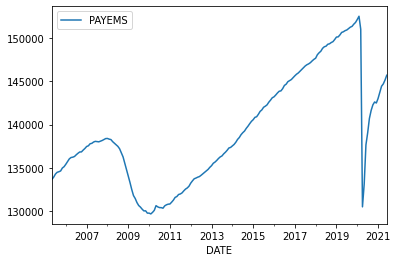

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

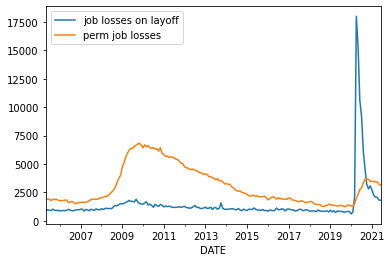

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

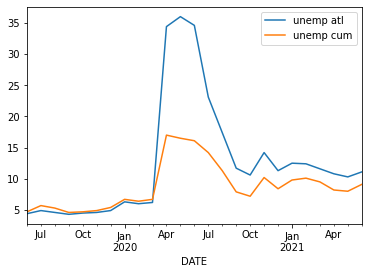

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

,atl,cum,sal,glo,cam,bur,cap may,ocean
DATE,,,,,,,,
2019-06-01,4.4,4.7,4.4,3.4,3.8,3.0,4.2,3.2


[]

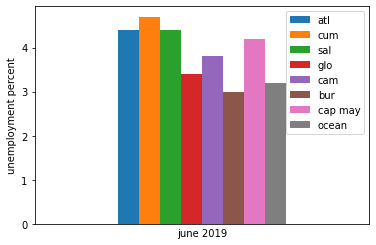

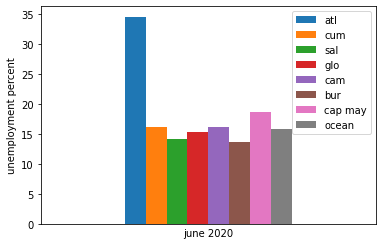

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


[]

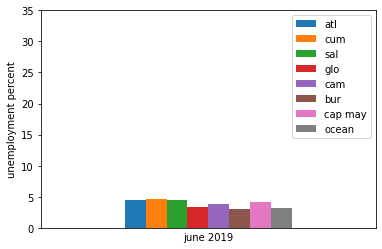

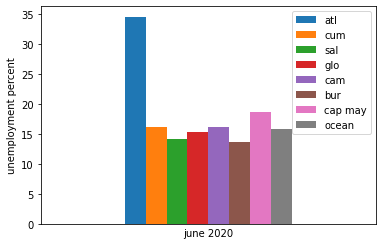

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10653,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10655,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10657,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10658,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

country,Canada,Mexico,United States
year,,,
2005,40989.526824,8925.236669,52789.731419
2006,41646.414637,9200.402581,53738.091725
2007,42097.435120,9288.162478,54299.617241
2008,42063.633052,9276.054837,53854.160612
2009,40368.292037,8677.758293,51996.183495
2010,41155.323638,9001.686162,52963.464170
2011,42036.997844,9199.146032,53394.861838
2012,42315.807389,9401.977909,54213.459552
2013,42846.284196,9404.596280,54830.784066


Text(0.5, 1.0, 'my title')

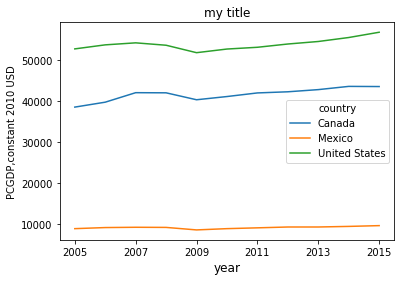

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

,id,name
947,9.0.Unemp.All,Unemployed (%)
948,9.0.Unemp.B40,Unemployed-Bottom 40 Percent (%)
949,9.0.Unemp.T60,Unemployed-Top 60 Percent (%)
965,9.1.Unemp.All,"Unemployed (%), Male"
966,9.1.Unemp.B40,"Unemployed-Bottom 40 Percent (%), Male"
...,...,...
17761,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...
17765,per_lm_alllm.cov_q2_tot,Coverage of unemployment benefits and ALMP in ...
17769,per_lm_alllm.cov_q3_tot,Coverage of unemployment benefits and ALMP in ...
17773,per_lm_alllm.cov_q4_tot,Coverage of unemployment benefits and ALMP in ...


In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2015    43596.135537               6.91
              2016    43536.913403               7.00
              2017    44325.488337               6.34
              2018    44917.483728               5.83
              2019    45109.244486               5.66
              2020    42258.691017               9.46
Mexico        2015     9753.380048               4.31
              2016     9897.150062               3.86
              2017     9997.686914               3.42
              2018    10120.363543               3.27
              2019    10013.703192               3.48
              2020     9147.053505               4.45
United States 2015    56762.729452               5.28
              2016    57292.538783               4.87
              2017    58207.578310               4.36
              2018    59607.393660               3.90
              2019    60698.011299               3.67
              2020    58453.446128               8.05

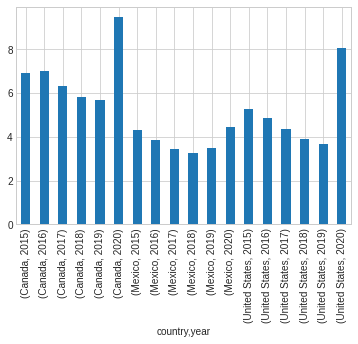

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

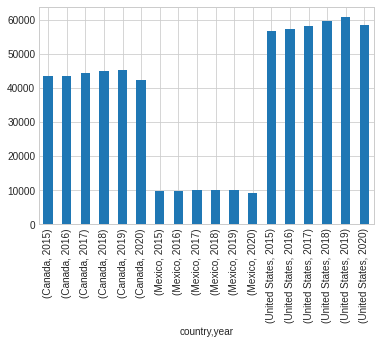

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")

# auto/ai clean -->> new notebook